# SEABORN

![image](images/sb1.png)

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt 

```python
import matplotlib.pyplot as plt
# is valid and functionally equivalent to:
from matplotlib import pyplot as plt

In [8]:
fmri = sns.load_dataset("fmri") # fmri dataset is built in in seaborn
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [9]:
fmri.shape

(1064, 5)

## LINEPLOT

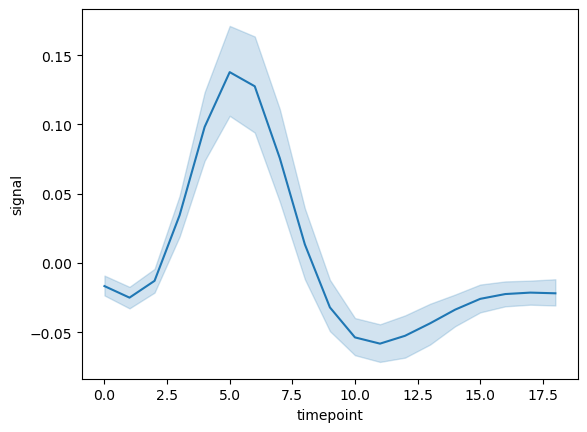

In [10]:
sns.lineplot(x="timepoint", y="signal", data=fmri)
plt.show()

`sns.lineplot() `automatically handles grouping by categorical variables and computes confidence intervals, which you’d have to manually implement in `matplotlib` if needed.

**Seaborn**'s `sns.lineplot()` **automatically**:

- Groups data by the x variable (like timepoint)

- Calculates the mean of the y variable (signal)

- Plots that mean line

- Adds a confidence interval (95% by default) using the standard error

```python
sns.lineplot(x="timepoint", y="signal", data=fmri)
```
This will:

- Group `fmri` by `timepoint`

- Compute the **mean signal** for each timepoint

- Plot a line of those means

- Add a shaded 95% confidence interval around the line

If we want to make same lineplot in matplotlib. It requires more code and aggregation. That's why seaborn is suitable for more effective visualization. For the shaded are in seaborn plot we need more coding, see the next plot.

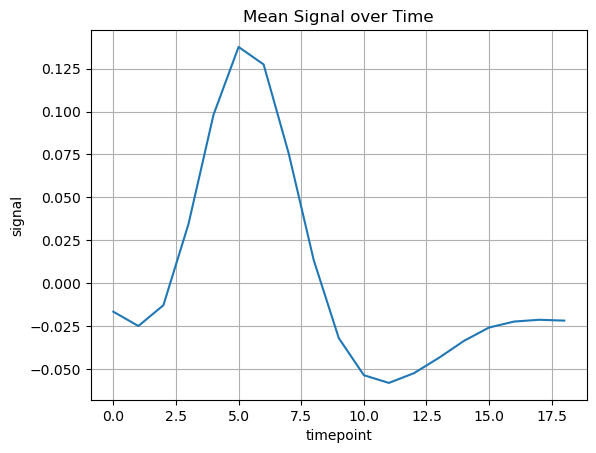

In [11]:
# making the same lineplot in matplotlib
import pandas as pd

# Step 1: Aggregate by timepoint (mean signal)
mean_signal = fmri.groupby("timepoint")["signal"].mean().reset_index()
sem = fmri.groupby("timepoint")["signal"].sem()  # standard error

# Step 2: Plot using matplotlib
plt.plot(mean_signal["timepoint"], mean_signal["signal"])
plt.xlabel("timepoint")
plt.ylabel("signal")
plt.title("Mean Signal over Time")
plt.grid(True)

plt.show()

If you want the ditto plot as in seaborn. You need little extra codding. 

let's add the **standard error** and the **95% confidence interval (CI)** as a shaded area around the line, just like Seaborn does by default.

This is why we use seaborn instead of matplotlib. It makes things easy.

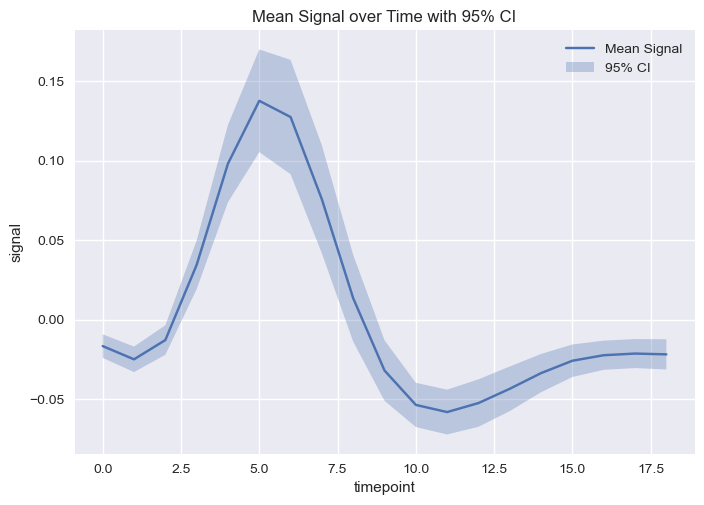

In [12]:
plt.style.use('seaborn-v0_8')  # Optional: match Seaborn aesthetics

# Step 1: Group and calculate mean and standard error
agg = fmri.groupby("timepoint")["signal"].agg(["mean", "sem"]).reset_index()

# Step 2: Compute 95% confidence interval
ci_upper = agg["mean"] + 1.96 * agg["sem"]
ci_lower = agg["mean"] - 1.96 * agg["sem"]

# Step 3: Plot mean line
plt.plot(agg["timepoint"], agg["mean"], label="Mean Signal")

# Step 4: Plot confidence interval
plt.fill_between(agg["timepoint"], ci_lower, ci_upper, alpha=0.3, label="95% CI")

# Step 5: Labels and styling
plt.xlabel("timepoint")
plt.ylabel("signal")
plt.title("Mean Signal over Time with 95% CI")
plt.grid(True)
plt.legend()
plt.show()

![image](images/sb2.png)

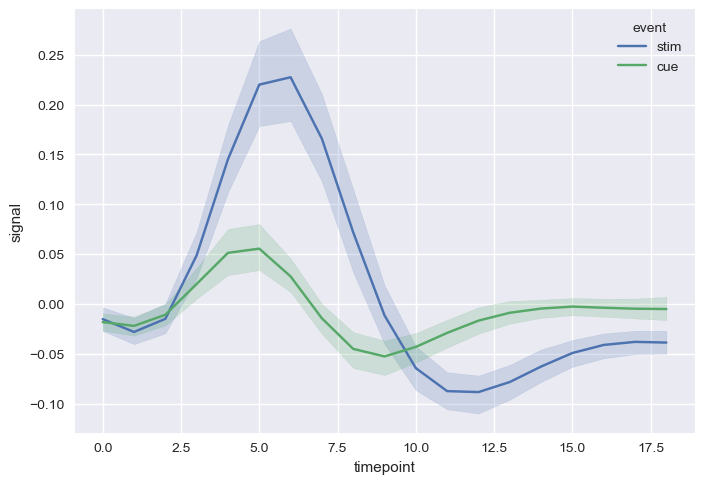

In [13]:
sns.lineplot(x="timepoint", y="signal", data=fmri, hue="event")
plt.show()

![image](images/sb3.png)

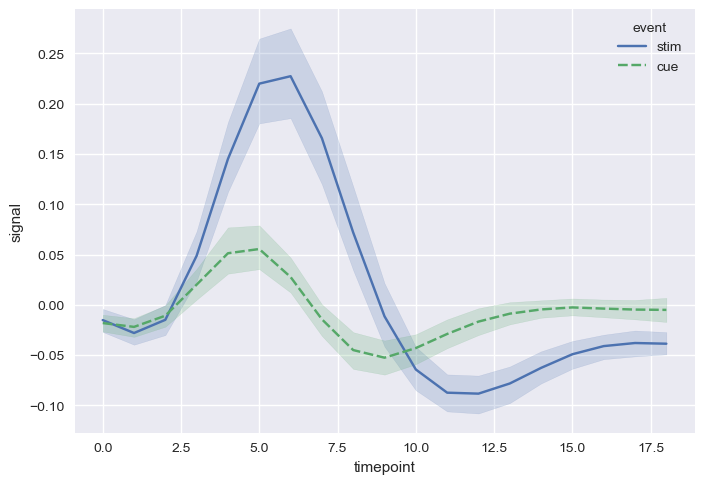

In [14]:
sns.lineplot(x="timepoint", y="signal", data=fmri, hue="event", style="event")
plt.show()

![image](images/sb4.png)

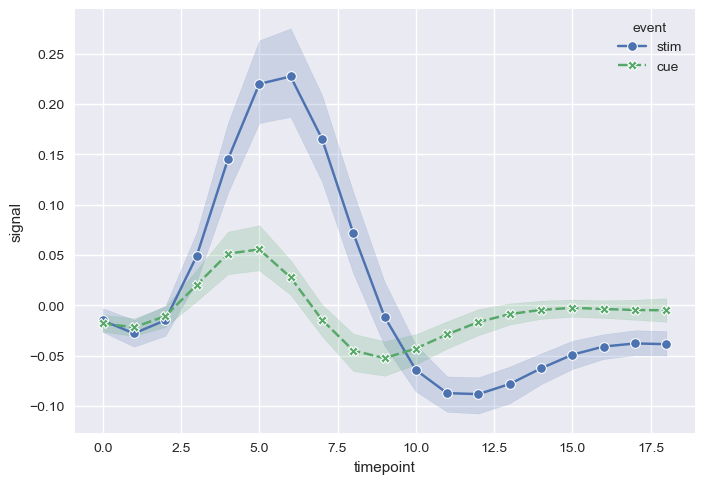

In [15]:
sns.lineplot(x="timepoint", y="signal", data=fmri, 
            hue="event", style="event", markers=True)
plt.show()

## BAR PLOT

![image](images/sb5.png)

In [16]:
pokemon = pd.read_csv("datasets/pokemon.csv")
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [17]:
pokemon.shape

(801, 41)

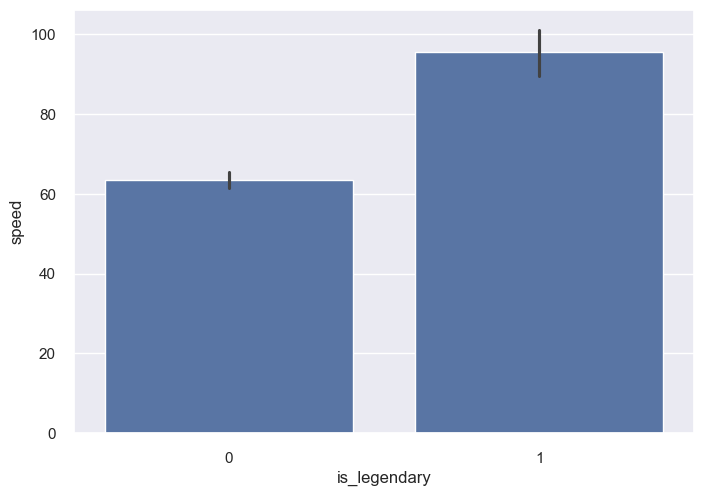

In [18]:
sns.set_theme(style="darkgrid")
sns.barplot(x="is_legendary", y="speed", data=pokemon)
plt.show()

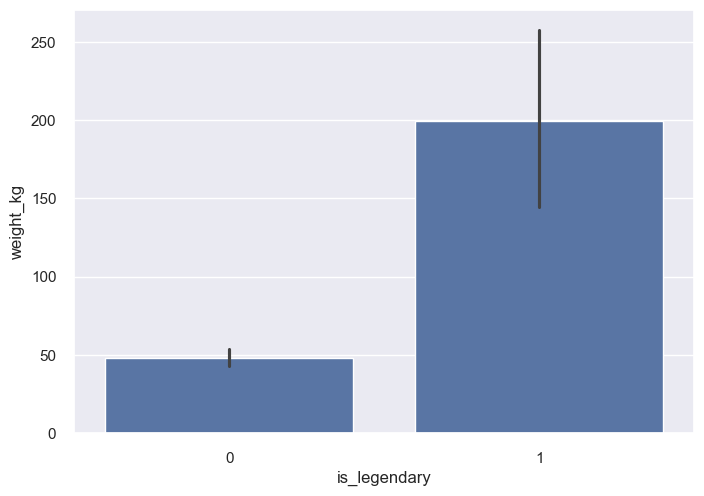

In [19]:
sns.barplot(x="is_legendary", y="weight_kg", data=pokemon)
plt.show()

![image](images/sb6.png)

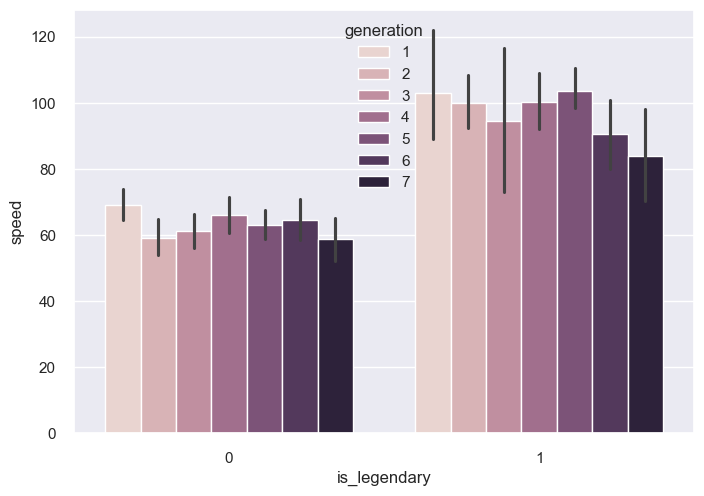

In [20]:
sns.barplot(x="is_legendary", y="speed", hue="generation", data=pokemon)

plt.show()

![image](images/sb7.png)

### PALETTE STYLES

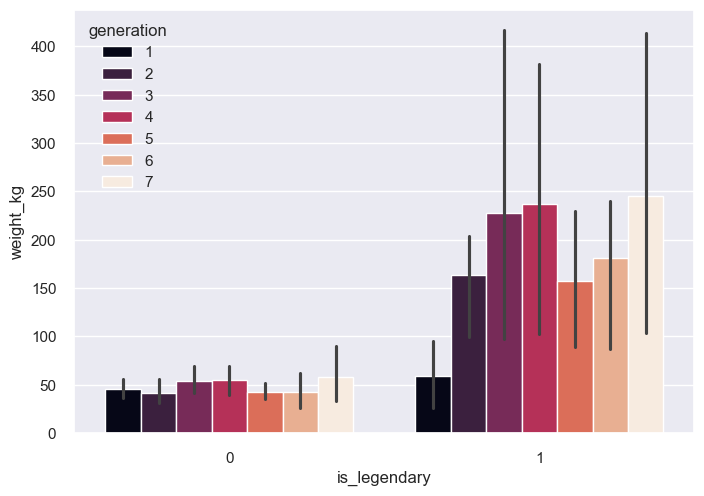

In [21]:
# Style 1
sns.barplot(x="is_legendary", y="weight_kg", hue="generation", data=pokemon, palette="rocket");

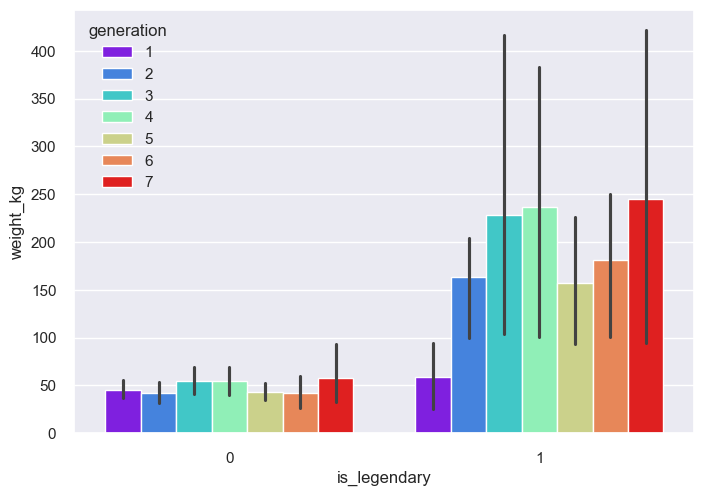

In [22]:
# Style 2
sns.barplot(x="is_legendary", y="weight_kg", hue="generation", data=pokemon, palette="rainbow");

<Axes: xlabel='is_legendary', ylabel='weight_kg'>

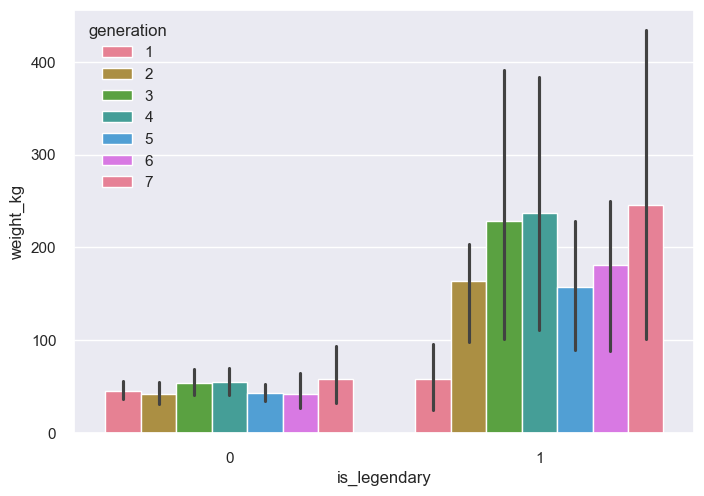

In [23]:
# Style 3
sns.barplot(x="is_legendary", y="weight_kg", hue="generation", data=pokemon, palette="husl")

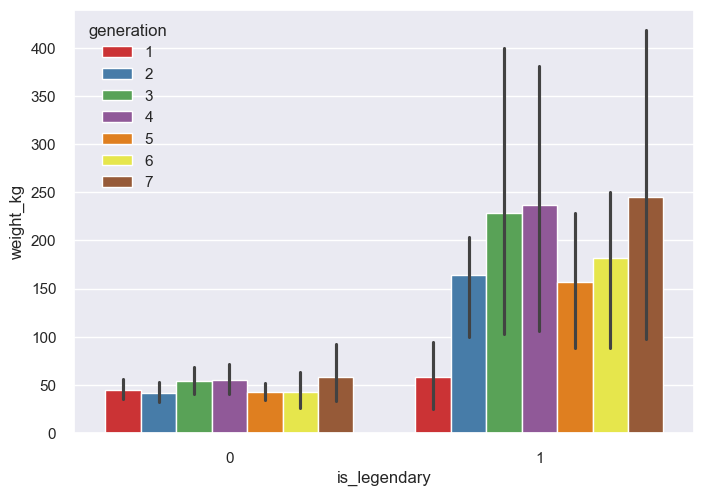

In [24]:
# Style 4
sns.barplot(x="is_legendary", y="weight_kg", hue="generation", data=pokemon, palette="Set1");

<Axes: xlabel='is_legendary', ylabel='weight_kg'>

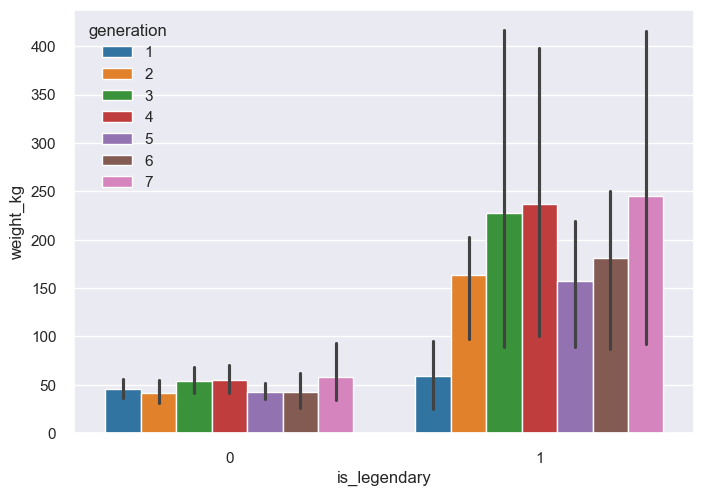

In [25]:
# Style 5
sns.barplot(x="is_legendary", y="weight_kg", hue="generation", data=pokemon, palette="tab10")

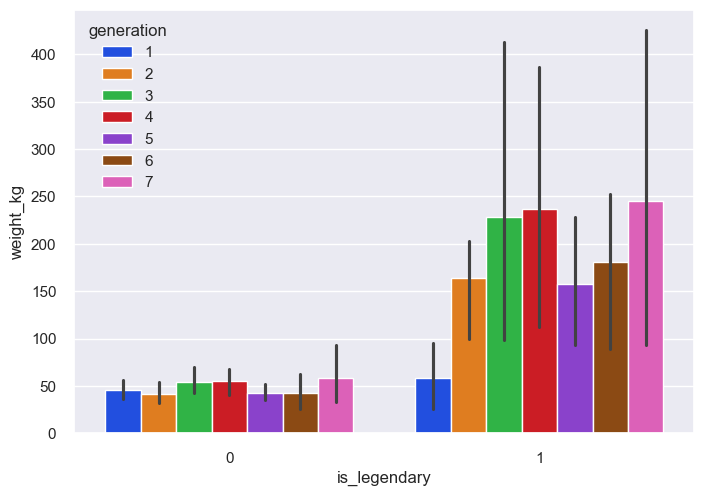

In [26]:
# Style 6
sns.barplot(x="is_legendary", y="weight_kg", hue="generation", data=pokemon, palette="bright");

<Axes: xlabel='is_legendary', ylabel='weight_kg'>

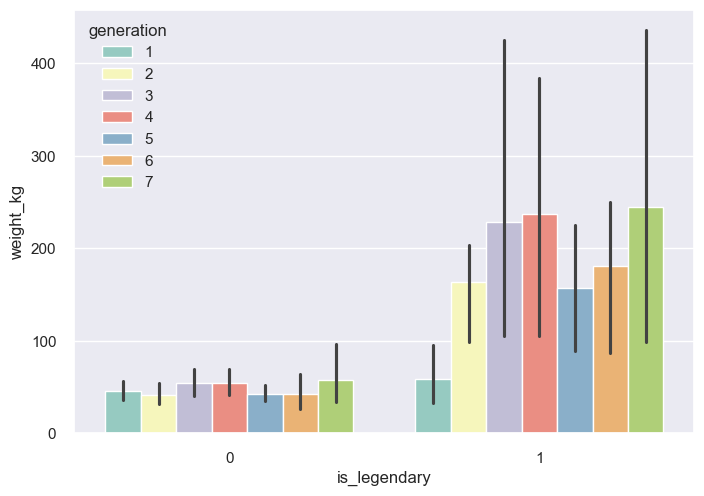

In [27]:
# Style 7
sns.barplot(x="is_legendary", y="weight_kg", hue="generation", data=pokemon, palette="Set3")

![image](images/sb8.png)

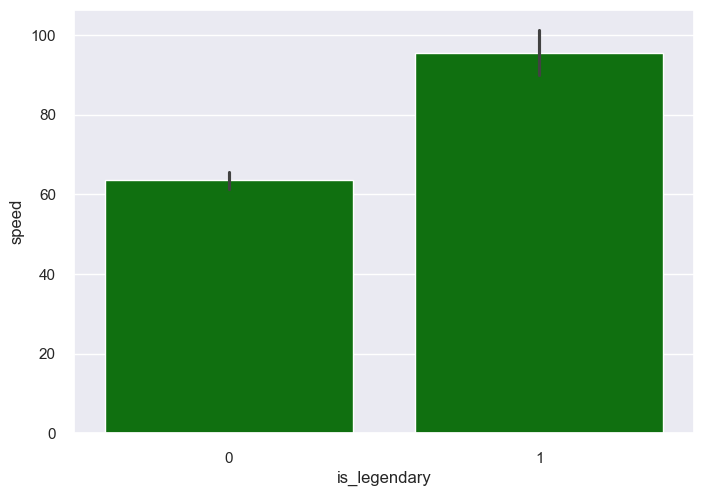

In [28]:
# If we want same color for both
sns.barplot(x="is_legendary", y="speed",data=pokemon, color="green");

## SCATTERPLOT

![image](images/sctr5.png)

In [29]:
iris = pd.read_csv("datasets/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


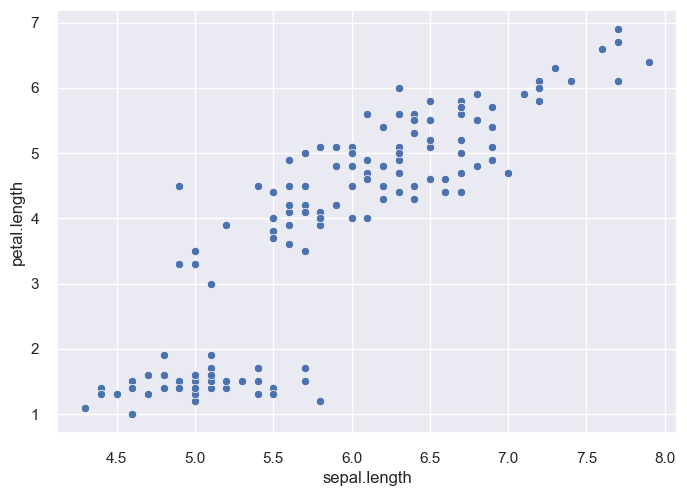

In [30]:
sns.scatterplot(x="sepal.length", y="petal.length", data=iris)

plt.show()

![image](images/sctr6.png)

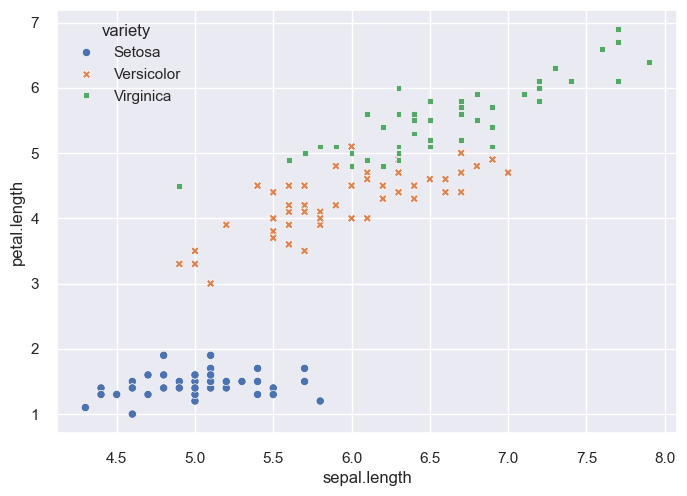

In [31]:
sns.scatterplot(x="sepal.length", y="petal.length", data=iris, hue="variety", style="variety");

![image](images/sctr7.png)

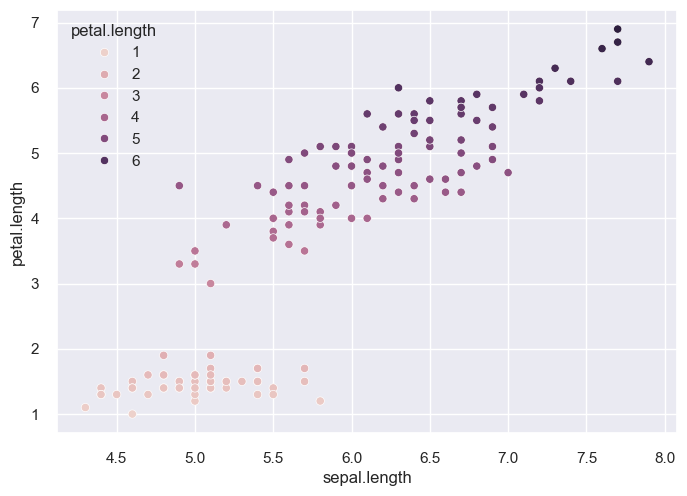

In [32]:
sns.scatterplot(x="sepal.length", y="petal.length", data=iris, hue="petal.length");

## HISTOGRAM/DISTRIBUTION PLOT

In [33]:
diamonds = pd.read_csv("datasets/diamonds.csv")
diamonds.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


We have an "Unnamed: 0" column which is the original index from when the CSV was saved, and pandas has created a new default index (0, 1, 2, 3, 4) on the left side.

To fix this, use `index_col=0` when reading the CSV:
```python
diamonds = pd.read_csv("datasets/diamonds.csv", index_col=0)
diamonds.head()
```
This will:

- Use the "Unnamed: 0" column as the actual index
- Remove the "Unnamed: 0" column from appearing as a data column
- Keep only one index column instead of having both the default index and the "Unnamed: 0" column

In [34]:
# Check the first few lines of the raw CSV
with open("datasets/diamonds.csv", 'r') as f:
    for i in range(5):
        print(f"Line {i}: {f.readline().strip()}")

Line 0: "","carat","cut","color","clarity","depth","table","price","x","y","z"
Line 1: "1",0.23,"Ideal","E","SI2",61.5,55,326,3.95,3.98,2.43
Line 2: "2",0.21,"Premium","E","SI1",59.8,61,326,3.89,3.84,2.31
Line 3: "3",0.23,"Good","E","VS1",56.9,65,327,4.05,4.07,2.31
Line 4: "4",0.29,"Premium","I","VS2",62.4,58,334,4.2,4.23,2.63


To get rid of unwanted first unnecessary index column

In [47]:
# Option 1: Skip the first column when reading
diamonds = pd.read_csv("datasets/diamonds.csv", index_col=0) # I used this one
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [36]:
# Option 2: Drop the unwanted index column after reading
diamonds = pd.read_csv("datasets/diamonds.csv")
diamonds = diamonds.drop(diamonds.columns[0], axis=1)  # drops first column
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [37]:
# Option 3: Reset the index if you want a clean integer index
# if you want a clean integer index starting from 0 and remove that "Unnamed: 0" column entirely
diamonds = pd.read_csv("datasets/diamonds.csv", index_col=0)
diamonds = diamonds.reset_index(drop=True)
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


The most common solution is **Option 1** using `index_col=0`, which tells pandas to use the first column as the index rather than creating a new default integer index alongside it.

![image](images/hist4.png)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_13248\839660094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds['price'])


<Axes: xlabel='price', ylabel='Density'>

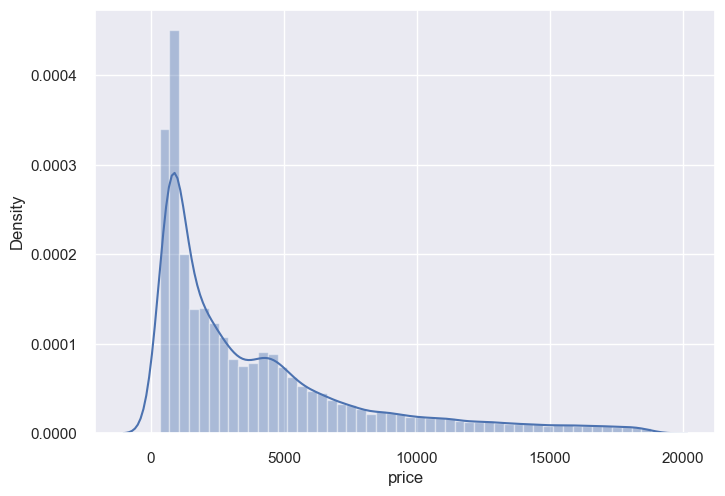

In [38]:
sns.distplot(diamonds['price'])

**Note:** `sns.distplot()` is deprecated. For newer seaborn versions, use:

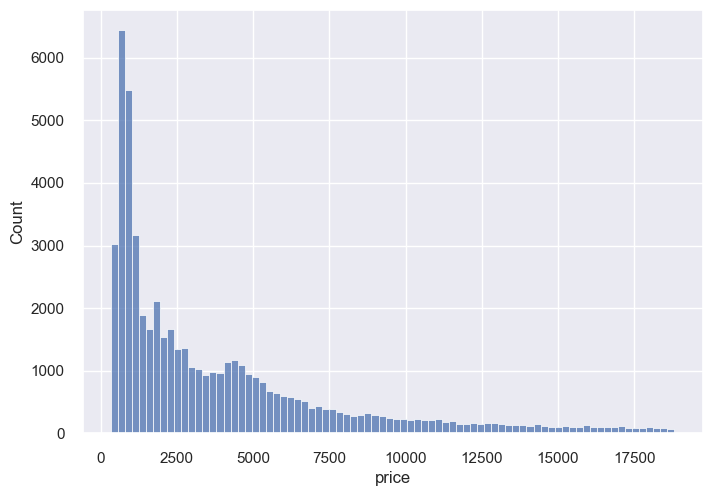

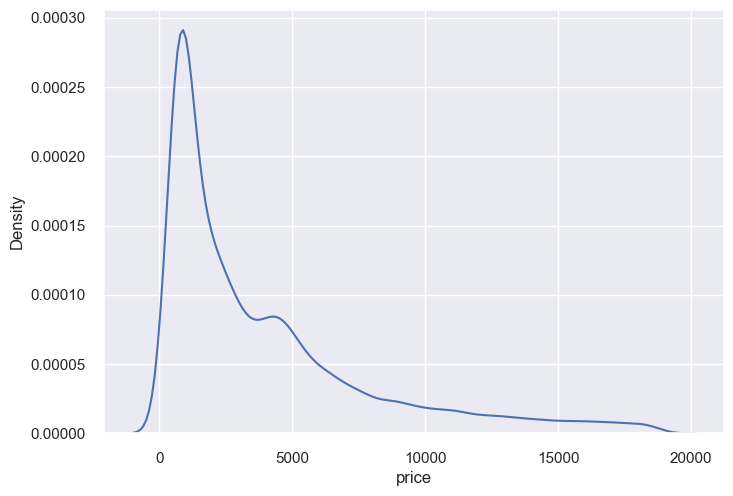

In [39]:
sns.histplot(diamonds['price'])  # for histogram
plt.show()
# or
sns.kdeplot(diamonds['price'])   # for density plot
plt.show()

The deprecated `sns.distplot()` showed density on the y-axis by default, while `sns.histplot()` shows count by default. To get density on the y-axis with `sns.histplot()`, you need to set the `stat` parameter to `"density"`:

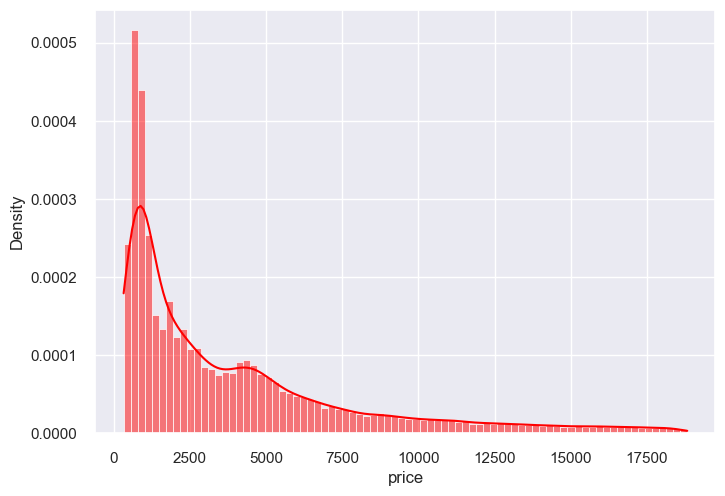

In [40]:
sns.histplot(diamonds['price'], color="red", kde=True, stat="density")
plt.show()

Use these, if you want both on same plot

**Option 1:** Use `sns.histplot()` with `kde=True`

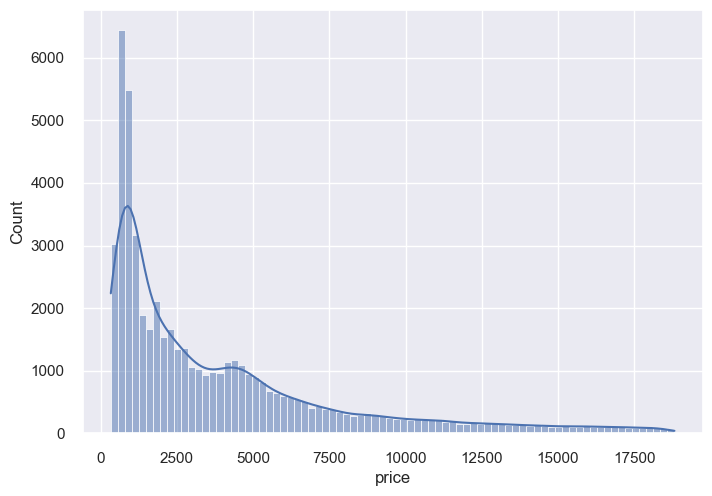

In [41]:
sns.histplot(diamonds['price'], kde=True)
plt.show()

**Option 2:** Layer `sns.histplot()` and `sns.kdeplot()` separately

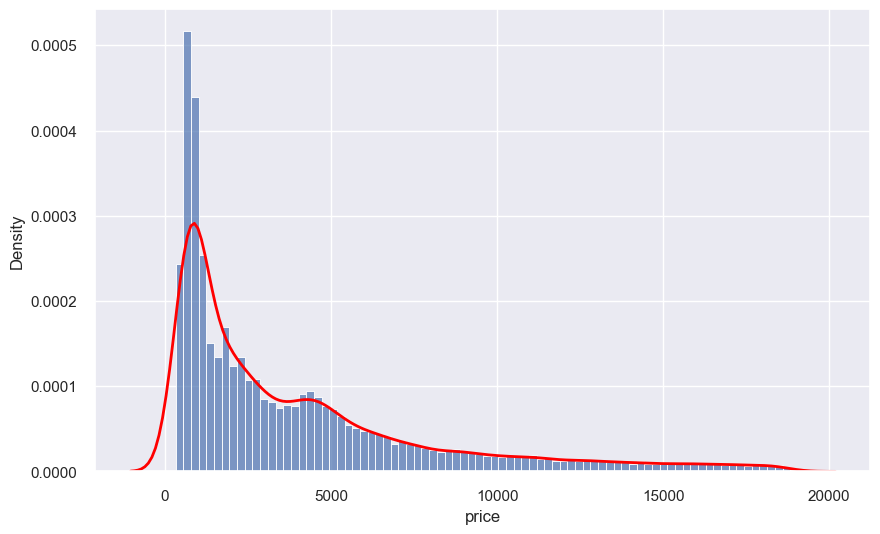

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['price'], alpha=0.7, stat='density')  # stat='density' normalizes the histogram
sns.kdeplot(diamonds['price'], color='red', linewidth=2)
plt.show()

**Option 4:** More control with separate plots on same axes

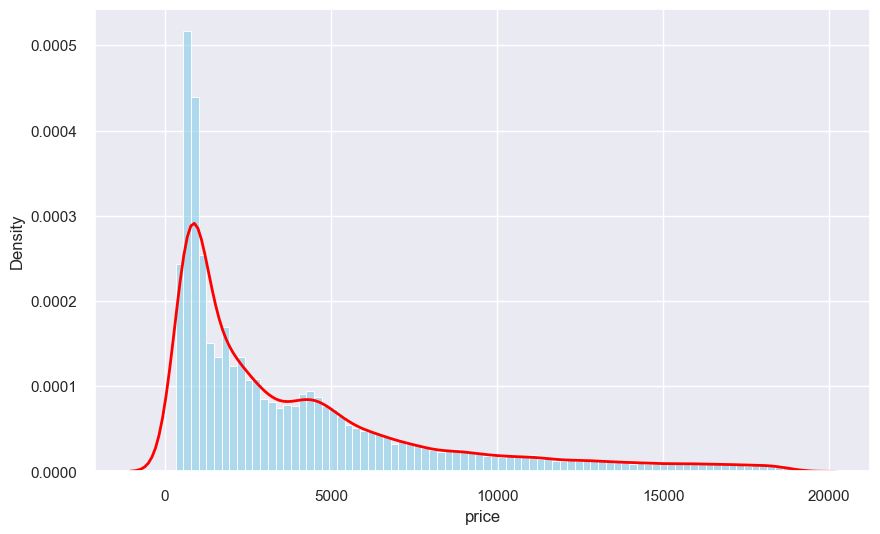

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(diamonds['price'], ax=ax, alpha=0.6, stat='density', color='skyblue')
sns.kdeplot(diamonds['price'], ax=ax, color='red', linewidth=2)
plt.show()

**Recommended approach:** Use **Option 1**(`sns.histplot(diamonds['price'], kde=True)`) as it's the most straightforward replacement for the old `distplot()`

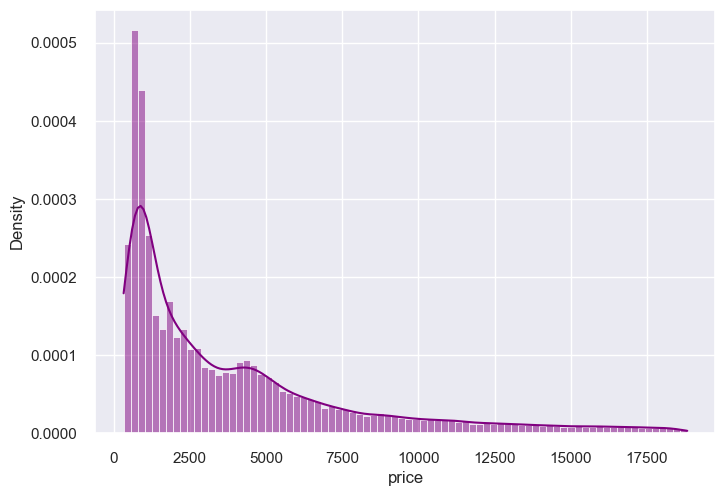

In [44]:
sns.histplot(diamonds['price'], color="purple", kde=True, stat="density")
plt.show()

![image](images/hist5.png)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_13248\1156449442.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds["price"], color="orange", vertical=True);


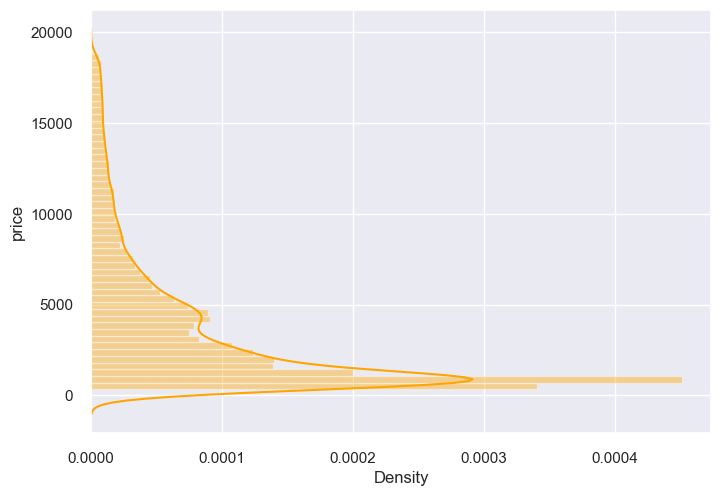

In [45]:
sns.distplot(diamonds["price"], color="orange", vertical=True);

C:\Users\Yahya\AppData\Local\Temp\ipykernel_13248\72241693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds["price"], color="orange", kde=False, bins=5, vertical=True);


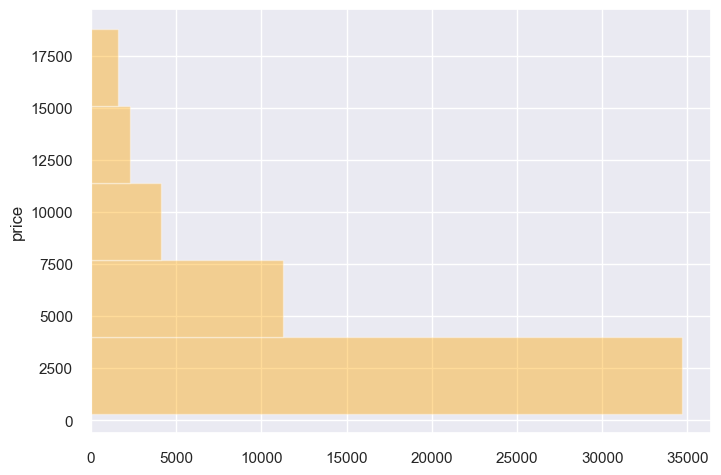

In [46]:
sns.distplot(diamonds["price"], color="orange", kde=False, bins=5, vertical=True);

## JOINT PLOT

![image](images/jp1.png)

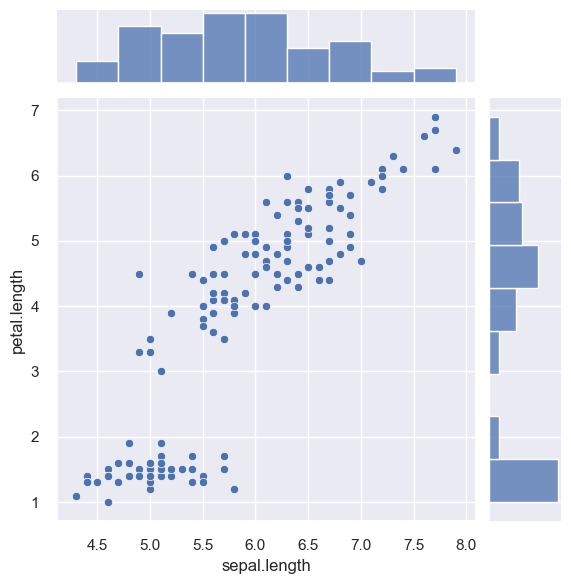

In [48]:
sns.jointplot(x="sepal.length", y="petal.length", data=iris);

![image](images/jp2.png)

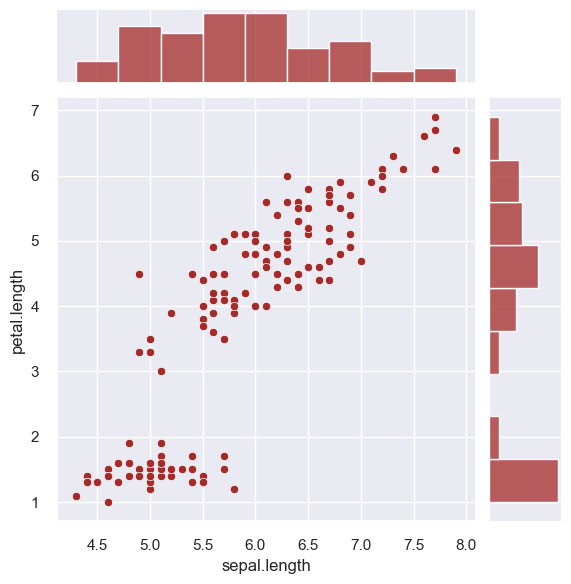

In [51]:
sns.jointplot(x="sepal.length", y="petal.length", data=iris, color="brown");

![image](images/jp3.png)

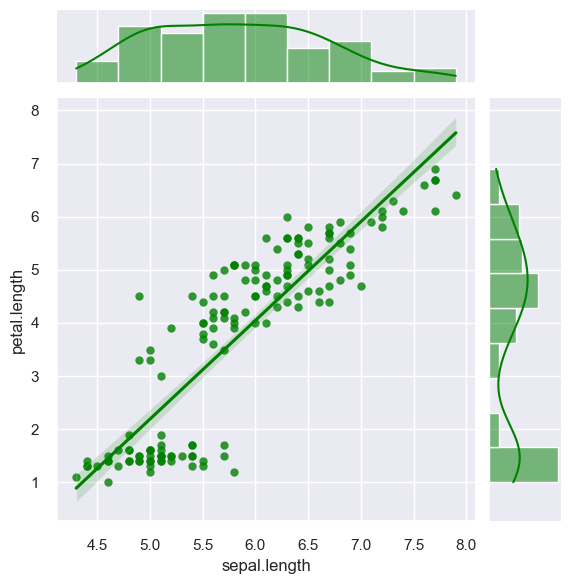

In [53]:
sns.jointplot(x="sepal.length", y="petal.length", data=iris, color="green", kind="reg");

## BOX PLOT

![image](images/bx2.png)

In [54]:
churn = pd.read_csv("datasets/churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


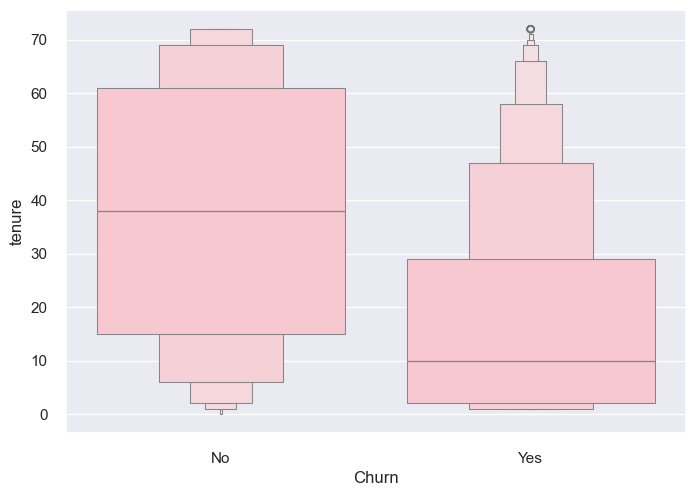

In [57]:
sns.boxenplot(x="Churn", y="tenure", data=churn, color="pink");

![image](images/bx3.png)

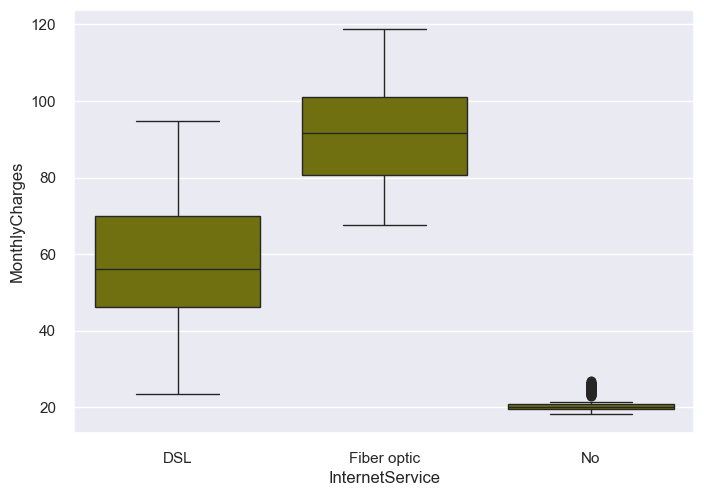

In [58]:
sns.boxplot(x="InternetService", y="MonthlyCharges", data=churn, color="olive");

![image](images/bx4.png)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_13248\2145663268.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Contract", y="tenure", data=churn, palette= "rainbow");


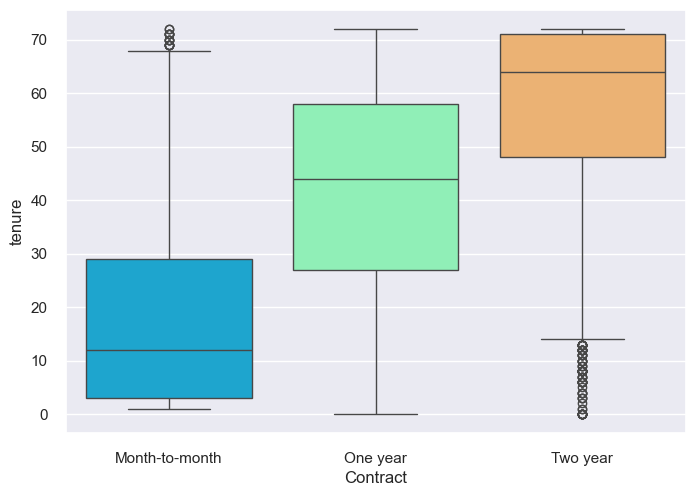

In [60]:
sns.boxplot(x="Contract", y="tenure", data=churn, palette= "rainbow");

![image](images/bx5.png)

C:\Users\Yahya\AppData\Local\Temp\ipykernel_13248\1679410151.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Contract", y="tenure", data=churn, palette="rocket", linewidth=4);


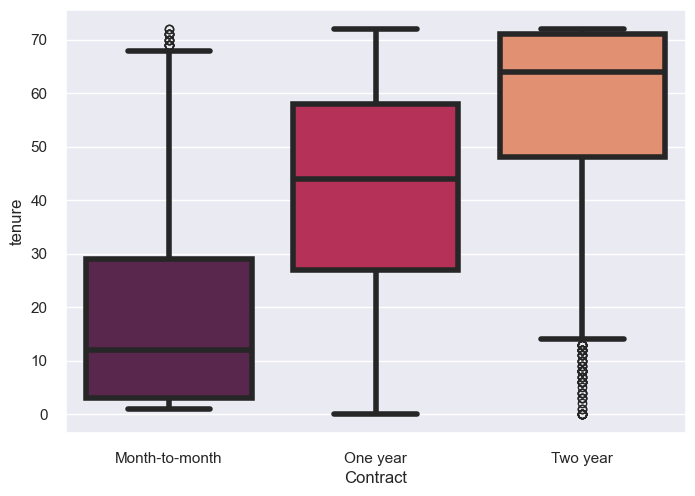

In [61]:
sns.boxplot(x="Contract", y="tenure", data=churn, palette="rocket", linewidth=4);

![image](images/bx6.png)

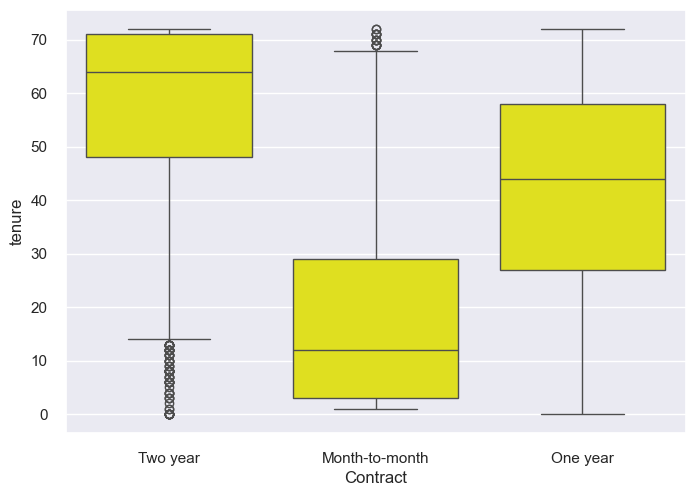

In [63]:
sns.boxplot(x="Contract", y="tenure", data=churn, order=["Two year", "Month-to-month", "One year"], color="yellow");

![image](images/bx7.png)

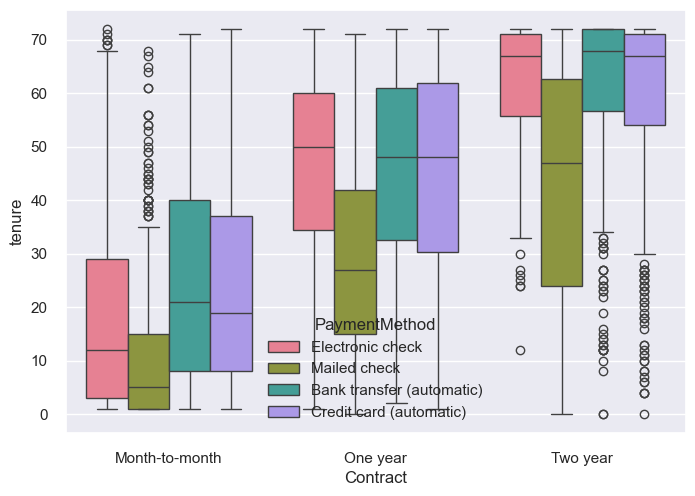

In [67]:
sns.boxplot(x="Contract", y="tenure", data=churn, hue="PaymentMethod", palette="husl");

## PAIR PLOT

![image](images/pp1.png)

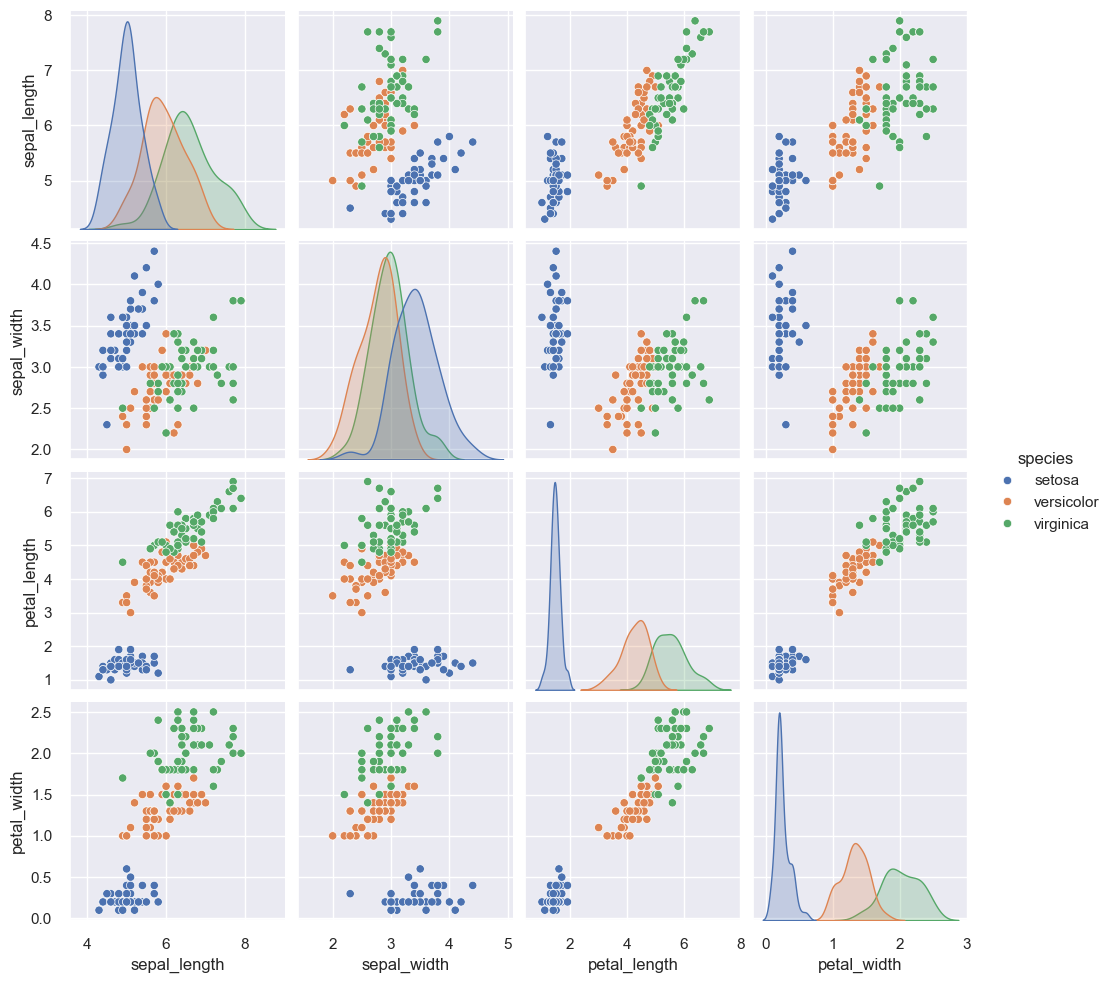

In [69]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species");